# Chapter 8, Example 3

In [ ]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)

# Initialize hyper-parameters
n_in = 8
n_hidden = 5
n_out = 3
n_steps = 64
n_seqs = 16
n_iters = 25000
lr = 0.0001

# Data Initialization for Training

In [ ]:
# Inputs
x_train = torch.tensor(np.random.rand(n_seqs, n_steps, n_in), dtype=torch.float32)
x_train_list = [x for x in x_train.split(1, dim=1)]

# Groundtruths
y_train = np.random.randint(size=(n_seqs, n_steps), low=0, high=n_out)
y_train = torch.tensor(y_train, dtype=torch.long)

In this section, we initialize the input and ground truth data required for training.

## Inputs:

1. **`x_train`**:
    - A tensor of shape `(n_seqs, n_steps, n_in)`.
    - The values are randomly generated using `np.random.rand()`, which produces values between 0 and 1.
    - The data type is set to `torch.float32` to ensure compatibility with PyTorch operations.

2. **`x_train_list`**:
    - A list of tensors, where each tensor represents a step in the sequence.
    - The `split` function is used to split the `x_train` tensor along the `dim=1` axis (which corresponds to the `n_steps` dimension). This results in a list of tensors, each of shape `(n_seqs, 1, n_in)`.

## Groundtruths:

1. **`y_train`**:
    - A numpy array of shape `(n_seqs, n_steps)`.
    - The values are randomly generated integers between 0 (inclusive) and `n_out` (exclusive) using `np.random.randint()`.
    - This array is then converted to a PyTorch tensor with data type `torch.long`, which is commonly used for integer values in PyTorch, especially for classification labels.

By initializing `x_train`, `x_train_list`, and `y_train`, we have prepared the input data and corresponding ground truth labels required for training a sequence model.


In [ ]:
class RNN(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super(RNN, self).__init__()

        self.n_hidden = n_hidden

        # Specify the weights and biases
        self.u = nn.Parameter(torch.randn(n_in, n_hidden) / np.sqrt(n_in))
        self.w = nn.Parameter(torch.randn(n_hidden, n_hidden) / np.sqrt(n_hidden))
        self.v = nn.Parameter(torch.randn(n_hidden, n_out) / np.sqrt(n_hidden))
        self.b = nn.Parameter(torch.zeros(n_hidden))
        self.c = nn.Parameter(torch.zeros(n_out))

    def forward(self, x):
        # The initial hidden state, which is a zero vector
        h = torch.zeros(x[0].shape[0], self.n_hidden)

        ys = []
        for i in range(0, len(x)):
            h = torch.tanh(torch.mm(x[i].squeeze(), self.u) + torch.mm(h, self.w) + self.b)
            u = torch.mm(h, self.v) + self.c
            ys.append(u)

        return torch.stack(ys, dim=1)

# Training the RNN Model

This section outlines the process of setting up and training the Recurrent Neural Network (RNN) model.

## Resetting Random Seeds:

To ensure reproducibility in the results, we reset the random seeds for both numpy and PyTorch.

- **`np.random.seed(seed)`**: Sets the random seed for numpy.
- **`torch.manual_seed(seed)`**: Sets the random seed for PyTorch.

In [ ]:
# Reset the random seed
np.random.seed(seed)
torch.manual_seed(seed)

# Initialize the model, optimizer and loss for training
rnn = RNN(n_in, n_hidden, n_out)
optimizer = optim.Adam(rnn.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()


## Model, Optimizer, and Loss Initialization:

1. **Model (`rnn`)**:
    - An instance of the `RNN` class is created with input size `n_in`, hidden size `n_hidden`, and output size `n_out`.

2. **Optimizer (`optimizer`)**:
    - The Adam optimizer is used, which is an adaptive learning rate optimization algorithm.
    - The learning rate is set to the value of `lr`.
    - All the trainable parameters of the `rnn` model are optimized.

3. **Loss Function (`criterion`)**:
    - The CrossEntropyLoss is used, which is suitable for classification tasks.
    - It combines the log softmax and negative log likelihood loss.

## Training Loop:

1. **Initialization**:
    - A list `loss_values` is initialized to store the loss values for each epoch.

2. **Epoch Iteration**:
    - For each epoch (up to `n_iters`):
        - The gradients are zeroed out using `optimizer.zero_grad()`.
        - The model's forward pass is executed on the input data `x_train_list`.
        - The loss is computed by comparing the model's outputs to the ground truth labels `y_train`.
        - Backpropagation is performed using `loss.backward()`.
        - The optimizer updates the model's parameters with `optimizer.step()`.
        - The computed loss value for the epoch is appended to the `loss_values` list.

After the training loop completes, the trained RNN model is ready for evaluation or deployment.

In [ ]:
# Training
print('Training starts...')
loss_values = []
for epoch in range(n_iters):
    optimizer.zero_grad()
    outputs = rnn(x_train_list)
    loss = criterion(outputs.view(-1, n_out), y_train.view(-1))
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
print('Training ended...')

## Visualization

Training starts...
Training ended...


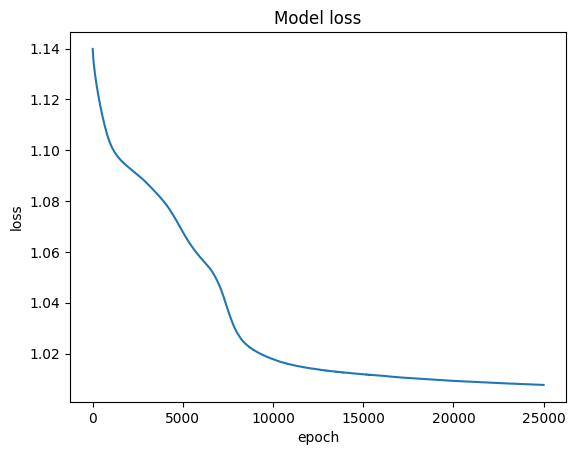

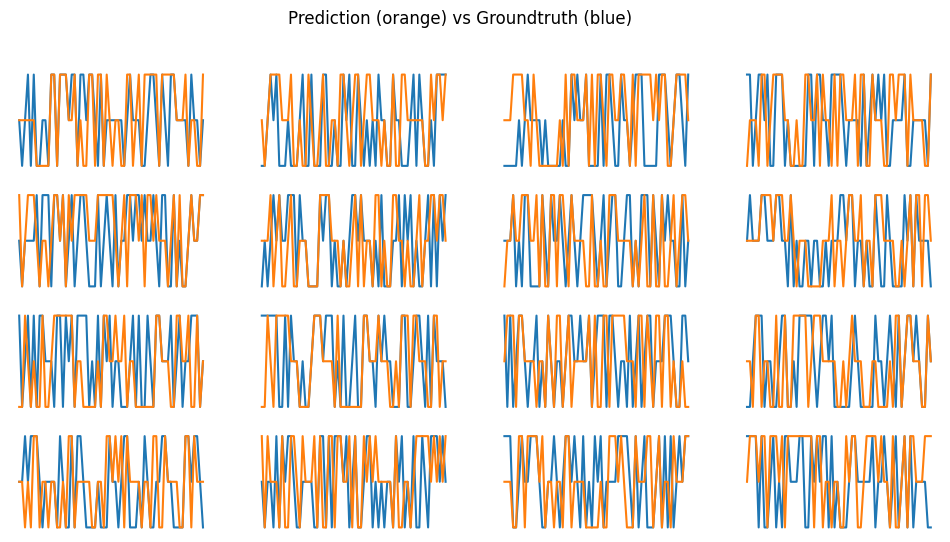

In [1]:
# Plot the loss curve
plt.plot(loss_values)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Pass the training data to the trained model
y_pred = rnn(x_train_list)
y_pred = torch.argmax(y_pred, dim=2)

# Plot the prediction vs the groundtruth
plt.figure(figsize=(12, 6))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i].numpy())
    ax.plot(range(n_steps), y_pred[i].numpy())
plt.suptitle('Prediction (orange) vs Groundtruth (blue)')
plt.show()